# Documentation
The code loads two CSV files, merges them, calculates the average historical quantity for each product in each store, prepares the data, trains a linear regression model, evaluates the model, saves the predictions to a new CSV file, and creates a linear regression diagram.

This model could be not helpful for the prediction if there are many factors that influence the quantity of products, and this model only takes into account the average historical quantity. Additionally, if the relationship between the average quantity and the quantity sold is not linear, the model may not be accurate. Finally, if the data is too noisy, the model may also not be accurate. This means that if there is too much randomness or variability in the data, the model may not be able to capture the underlying patterns or relationships accurately, and hence, the predictions made by the model may not be reliable. In other words, if the data has a lot of random fluctuations or errors, it can make it difficult for the model to find meaningful patterns and make accurate predictions.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data from CSV files

In [2]:
stores = pd.read_csv('stores_data.csv')
product_availability_table = pd.read_csv('product_data.csv')

# Merge the data

In [3]:
data = pd.merge(stores, product_availability_table, on='store_id')

# Calculate the average historical quantity for each product in each store

In [4]:
average_availability = data.groupby(['store_id', 'product_name'])['quantity'].mean().reset_index()
data = pd.merge(data, average_availability, on=['store_id', 'product_name'], suffixes=('', '_average'))

# Prepare the data

In [5]:
X = data[['quantity_average']]
y = data['quantity']

# Split the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Evaluate the model

In [8]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0050552151643643555


# Save the predictions to a new CSV file

In [9]:
# Prepare the predictions dataframe
predictions_df = X_test.copy()
predictions_df['predicted_quantity'] = y_pred
predictions_df = pd.merge(predictions_df, data, left_index=True, right_index=True, suffixes=('', '_original'))

# Select the required columns
predictions_df = predictions_df[['product_name', 'brand', 'category', 'description', 'quantity', 'quantity_average', 'predicted_quantity']]

# Save the predictions dataframe to a csv file
predictions_df.to_csv("predictions.csv", index=False)

InvalidIndexError: (slice(None, None, None), None)

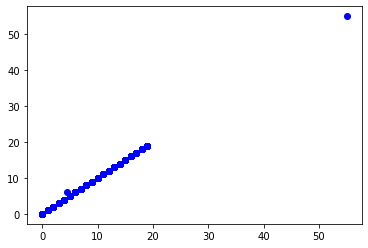

In [10]:
# Create Linear regression diagram

plt.scatter(X_test, y_test, color='blue', label='Actual')

# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

# Customize the plot
plt.xlabel('Average Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Linear Regression Visualization')
plt.legend()

# Display the plot
plt.show()

In [ ]:

product_name = 'Hafer'

# Filter the data for a specific product and brand
specific_product = data[(data['product_name'].str.contains(product_name))]

# Create a scatter plot of average historical quantity vs. current quantity
plt.scatter(specific_product['quantity_average'], specific_product['quantity'], color='blue')

# Create a line
#x_values = specific_product['quantity_average'].values.reshape(-1, 1)
#y_values = lr.predict(x_values)
#plt.plot(x_values, y_values, color='red', linewidth=2)

# Set labels and title
plt.xlabel('Average Historical Quantity')
plt.ylabel('Current Quantity')
plt.title(f'Linear Regression for {product_name}')

# Show the plot
plt.show()

specific_product
